<p>Importing all the necessary packages</p>

In [44]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

<p> Unzipping the raw dataset</p>

In [3]:
!unzip DigitDatasetLatest.zip

Archive:  DigitDatasetLatest.zip
   creating: Digit Dataset latest/
   creating: Digit Dataset latest/2/
  inflating: Digit Dataset latest/2/WhatsApp Image 2021-05-02 at 21.20.27.jpeg  
  inflating: Digit Dataset latest/2/WhatsApp Image 2021-05-02 at 21.20.27 (1).jpeg  
  inflating: Digit Dataset latest/2/WhatsApp Image 2021-05-02 at 21.20.27 (2).jpeg  
  inflating: Digit Dataset latest/2/WhatsApp Image 2021-05-02 at 21.20.27 (3).jpeg  
  inflating: Digit Dataset latest/2/WhatsApp Image 2021-05-02 at 21.20.27 (4).jpeg  
  inflating: Digit Dataset latest/2/WhatsApp Image 2021-05-02 at 21.20.27 (5).jpeg  
  inflating: Digit Dataset latest/2/WhatsApp Image 2021-05-02 at 21.20.27 (6).jpeg  
  inflating: Digit Dataset latest/2/WhatsApp Image 2021-05-02 at 21.20.27 (7).jpeg  
  inflating: Digit Dataset latest/2/WhatsApp Image 2021-05-02 at 21.20.27 (8).jpeg  
  inflating: Digit Dataset latest/2/WhatsApp Image 2021-05-02 at 21.20.27 (9).jpeg  
  inflating: Digit Dataset latest/2/WhatsApp Imag

<p>The images that were manually collected was masked and resized. The below cell shows the code for showing the result before doing the same to the raw dataset. The first image just masks the image, the next one shows the result and the last one shows the final resized result</p>

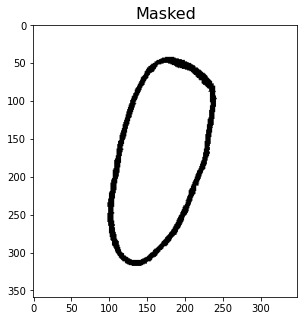

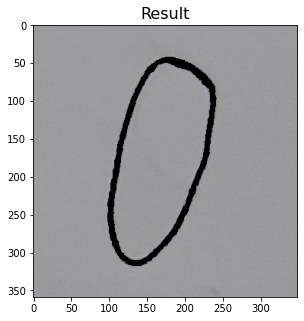

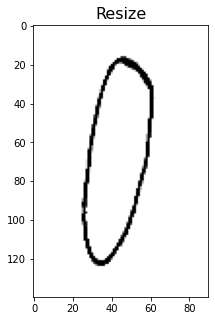

In [11]:
def show(title, img, color=True):
    plt.figure(figsize=(5,5))
    if color:
        plt.imshow(img[:,:,::-1]), plt.title(title, fontsize=(16))
        plt.show()
    else:
        plt.imshow(img, cmap='gray'), plt.title(title, fontsize=(16)), plt.show()

img = cv2.imread('./Digit Dataset latest/0/WhatsApp Image 2021-05-06 at 21.08.15 (1).jpeg')
mask= cv2.inRange(img,(0,0,140),(360,360,360))
show('Masked', mask, False)
res=255-cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)
res = cv2.bitwise_and(img, img, mask=mask)
show('Result', res, True)
img_resized = cv2.resize(mask, (90, 140))
show('Resize',img_resized,color=False)

<p>Empty Directory 'ResizedDataSet' was created</p>

In [12]:
!mkdir ResizedDataSet
os.chdir('ResizedDataSet')
for i in ['0','1','2','3','4','5','6','7','8','9']:  
    os.mkdir(i)
os.chdir('../')

<p> The masked and resized data was uploaded folderwise in the empty folder called ResizedDataSet</p>

In [13]:
BASE_FOLDER = './Digit Dataset latest/'
RESIZED_FOLDER = './ResizedDataSet/'
folders = os.listdir(BASE_FOLDER)
from PIL import Image
for folder in folders:
  for fileim in os.listdir(BASE_FOLDER + folder + '/'):
    imgfile=BASE_FOLDER + folder + '/'+fileim 
    print(imgfile)
    img = cv2.imread(imgfile)
    mask=cv2.inRange(img,(0,0,120),(360,360,360))
    img_resized = cv2.resize(mask, (90, 140))
    savedfile=RESIZED_FOLDER + folder + '/' +fileim
    cv2.imwrite(savedfile,img_resized)

./Digit Dataset latest/7/WhatsApp Image 2021-05-02 at 20.44.39.jpeg
./Digit Dataset latest/7/WhatsApp Image 2021-05-02 at 20.37.33.jpeg
./Digit Dataset latest/7/WhatsApp Image 2021-05-02 at 20.44.24.jpeg
./Digit Dataset latest/7/WhatsApp Image 2021-05-02 at 20.41.20.jpeg
./Digit Dataset latest/7/WhatsApp Image 2021-05-02 at 20.37.48.jpeg
./Digit Dataset latest/7/WhatsApp Image 2021-05-02 at 20.44.50.jpeg
./Digit Dataset latest/7/WhatsApp Image 2021-05-02 at 20.40.33.jpeg
./Digit Dataset latest/7/WhatsApp Image 2021-05-02 at 20.44.12.jpeg
./Digit Dataset latest/7/WhatsApp Image 2021-05-02 at 20.43.13.jpeg
./Digit Dataset latest/7/WhatsApp Image 2021-05-02 at 20.42.25.jpeg
./Digit Dataset latest/7/WhatsApp Image 2021-05-02 at 20.42.42.jpeg
./Digit Dataset latest/7/WhatsApp Image 2021-05-02 at 20.37.06.jpeg
./Digit Dataset latest/7/WhatsApp Image 2021-05-02 at 20.43.28.jpeg
./Digit Dataset latest/7/WhatsApp Image 2021-05-02 at 20.40.48.jpeg
./Digit Dataset latest/7/WhatsApp Image 2021-05-

<p> Now the folder was downloaded and was manually divided into 15 training and 5 test set examples, and then we unzip the train and test folders</p>

In [14]:
!unzip test.zip
!unzip train.zip

Archive:  test.zip
   creating: test/
   creating: test/2/
  inflating: test/2/WhatsApp Image 2021-05-02 at 21.20.27 (15).jpeg  
  inflating: test/2/WhatsApp Image 2021-05-02 at 21.20.27 (6).jpeg  
  inflating: test/2/WhatsApp Image 2021-05-02 at 21.20.27 (16).jpeg  
  inflating: test/2/WhatsApp Image 2021-05-02 at 21.20.27 (14).jpeg  
  inflating: test/2/WhatsApp Image 2021-05-02 at 21.20.27 (7).jpeg  
   creating: test/3/
  inflating: test/3/WhatsApp Image 2021-05-05 at 20.10.44.jpeg  
  inflating: test/3/WhatsApp Image 2021-05-05 at 20.11.44.jpeg  
  inflating: test/3/WhatsApp Image 2021-05-05 at 20.10.29.jpeg  
  inflating: test/3/WhatsApp Image 2021-05-05 at 20.11.23.jpeg  
  inflating: test/3/WhatsApp Image 2021-05-05 at 20.11.03.jpeg  
   creating: test/4/
  inflating: test/4/WhatsApp Image 2021-05-05 at 19.58.15.jpeg  
  inflating: test/4/WhatsApp Image 2021-05-05 at 19.57.48.jpeg  
  inflating: test/4/WhatsApp Image 2021-05-05 at 19.57.20.jpeg  
  inflating: test/4/WhatsApp Im

###Now we convert the train and test examples into grayscale and flatten it to transform into 1D numpy array.

In [15]:
# lists to store data
traindata = []
trainlabel = []

# folder where data is placed
BASE_FOLDERTRAIN = './train/'
BASE_FOLDERTEST = './test/'

folders = os.listdir(BASE_FOLDERTRAIN)

for folder in folders:
    for fileim in os.listdir(BASE_FOLDERTRAIN + folder + '/'):
        img = Image.open(BASE_FOLDERTRAIN + folder + '/' + fileim).convert('LA')
        img = np.asarray(img).flatten()
        img.resize(img.shape[0])
        # do any pre-processing if needed like resize, sharpen etc.
        traindata.append(img)
        trainlabel.append(folder)

testdata=[]
testlabel=[]
for folder in folders:
    for fileim in os.listdir(BASE_FOLDERTEST + folder + '/'):
        img = Image.open(BASE_FOLDERTEST + folder + '/' + fileim).convert('LA')
        img = np.asarray(img).flatten()
        img.resize(img.shape[0])
        # do any pre-processing if needed like resize, sharpen etc.
        testdata.append(img)
        testlabel.append(folder)

<p>Now, we try various well known classification algorithms to predict the classes of all 10 digits and then display its confusion matrix and accuracy</p>
<p> We use the following classfiers:</p>

* Support Vector Machine Classifier
* Random Forest Classifier
* Extra Trees Classifier
* Gaussian Naive Bayes Classifier




In [63]:
clf = RandomForestClassifier(n_estimators=100, random_state=35)
clf.fit(traindata,trainlabel)
y_predrfc=clf.predict(testdata)
print(confusion_matrix(testlabel,y_predrfc))
print(classification_report(testlabel,y_predrfc))

[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0 1 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 4 1 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      0.80      0.89         5
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5
           5       0.80      0.80      0.80         5
           6       0.83      1.00      0.91         5
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



In [21]:
clf = svm.SVC()
clf.fit(traindata,trainlabel)
y_predsvm = clf.predict(testdata)
print(confusion_matrix(testlabel,y_predsvm))
print(classification_report(testlabel,y_predsvm))

[[3 0 0 0 0 0 2 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 4 0 1 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 1 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       0.83      1.00      0.91         5
           5       1.00      0.80      0.89         5
           6       0.71      1.00      0.83         5
           7       0.80      0.80      0.80         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.93      0.92      0.92        50



In [31]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(traindata,trainlabel)
y_predetc = etc.predict(testdata)
print(confusion_matrix(testlabel,y_predetc))
print(classification_report(testlabel,y_predetc))

[[3 0 0 0 0 1 1 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 1 0 0 0]
 [0 0 0 4 0 0 0 1 0 0]
 [0 0 0 0 4 0 0 0 0 1]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 1 0 0 0 4 0 0 0]
 [0 0 0 0 1 0 0 4 0 0]
 [0 0 0 1 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         5
           2       0.80      0.80      0.80         5
           3       0.80      0.80      0.80         5
           4       0.80      0.80      0.80         5
           5       0.83      1.00      0.91         5
           6       0.67      0.80      0.73         5
           7       0.80      0.80      0.80         5
           8       1.00      0.80      0.89         5
           9       0.83      1.00      0.91         5

    accuracy                           0.84        50
   macro avg       0.85      0.84      0.84        50
weighted avg       0.85      0.84      0.84        50



In [36]:
GNBmodel = GaussianNB()
GNBmodel = GNBmodel.fit(traindata,trainlabel)
y_predgnb = GNBmodel.predict(testdata)
print(confusion_matrix(testlabel,y_predgnb))
print(classification_report(testlabel,y_predgnb))

[[5 0 0 0 0 0 0 0 0 0]
 [0 4 1 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 1 0 1 0]
 [0 0 0 3 0 0 0 0 2 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 2 0]
 [0 0 0 0 0 0 4 0 1 0]
 [0 0 1 0 0 0 0 3 1 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.60      0.60      0.60         5
           3       1.00      0.60      0.75         5
           4       1.00      1.00      1.00         5
           5       1.00      0.60      0.75         5
           6       0.80      0.80      0.80         5
           7       1.00      0.60      0.75         5
           8       0.42      1.00      0.59         5
           9       1.00      1.00      1.00         5

    accuracy                           0.80        50
   macro avg       0.88      0.80      0.81        50
weighted avg       0.88      0.80      0.81        50



<p> Therefore we have successfully created a highly accurate hand written digit recognition module which requires very little amount of data to train.</p>